# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [8]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [9]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [10]:
### Some insights into the lables in training set
set_of_labels = set(y_train)
for label in set_of_labels:
    num_examples = len([y for y in y_train if y == label])
    print('label = ', label, ", number of examples = ", num_examples)

label =  0 , number of examples =  210
label =  1 , number of examples =  2220
label =  2 , number of examples =  2250
label =  3 , number of examples =  1410
label =  4 , number of examples =  1980
label =  5 , number of examples =  1860
label =  6 , number of examples =  420
label =  7 , number of examples =  1440
label =  8 , number of examples =  1410
label =  9 , number of examples =  1470
label =  10 , number of examples =  2010
label =  11 , number of examples =  1320
label =  12 , number of examples =  2100
label =  13 , number of examples =  2160
label =  14 , number of examples =  780
label =  15 , number of examples =  630
label =  16 , number of examples =  420
label =  17 , number of examples =  1110
label =  18 , number of examples =  1200
label =  19 , number of examples =  210
label =  20 , number of examples =  360
label =  21 , number of examples =  330
label =  22 , number of examples =  390
label =  23 , number of examples =  510
label =  24 , number of examples =  

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

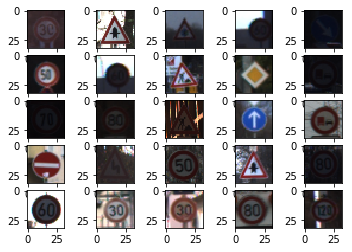

In [12]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

fig = plt.figure()
n = 5
for i in range(n ** 2):
    image = X_train[random.randint(0, len(X_train))]
    fig.add_subplot(n, n, i + 1)
    plt.imshow(image)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [13]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
Nothing special, just shuffled them to prevent the order of data from having any effect on the model.

In [14]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I did not generate additional data

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x8.
    conv1_W = tf.Variable(tf.truncated_normal((5, 5, 3, 8), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(8))
    conv1 = tf.nn.conv2d(x, conv1_W, [1, 1, 1, 1], "VALID") + conv1_b

    # Layer 2: Convolutional. Input = 28x28x8. Output = 24x24x16.
    conv2_W = tf.Variable(tf.truncated_normal((5, 5, 8, 20), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(20))
    conv2 = tf.nn.conv2d(conv1, conv2_W, [1, 1, 1, 1], "VALID") + conv2_b
    
    # Activation.
    relu1 = tf.sigmoid(conv2)

    # Pooling. Input = 24x24x16. Output = 12x12x16
    maxpool2 = tf.nn.max_pool(relu1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')

    # Layer 3: Convolutional. Input = 12x12x16, Output = 10x10x32.
    conv3_W = tf.Variable(tf.truncated_normal((3, 3, 20, 40), mean=mu, stddev=sigma))
    conv3_b = tf.Variable(tf.zeros(40))
    conv3 = tf.nn.conv2d(maxpool2, conv3_W, [1, 1, 1, 1], "VALID") + conv3_b
    
    # Layer 4: Convolutional. Input = 10x10x32, Output = 8x8x64.
    conv4_W = tf.Variable(tf.truncated_normal((3, 3, 40, 80), mean=mu, stddev=sigma))
    conv4_b = tf.Variable(tf.zeros(80))
    conv4 = tf.nn.conv2d(conv3, conv4_W, [1, 1, 1, 1], "VALID") + conv4_b
    
    # Activation.
    relu4 = tf.sigmoid(conv4)

    # Pooling. Input = 8x8x80. Output = 4x4x80.
    maxpool4 = tf.nn.max_pool(relu4, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')

    # Flattening. Input = 4x4x80, output = 1280
    fc0 = flatten(maxpool4)
    
    # Layer 3: Fully Connected. Input = 1280. Output = 400.
    fc1_W = tf.Variable(tf.truncated_normal((1280, 400), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    relu_fc1 = tf.sigmoid(fc1)

    # TODO: Layer 4: Fully Connected. Input = 400. Output = 128.
    fc2_W = tf.Variable(tf.truncated_normal((400, 128), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(128))
    fc2 = tf.matmul(relu_fc1, fc2_W) + fc2_b
    
    # Activation.
    relu_fc2 = tf.sigmoid(fc2)

    # Layer 5: Fully Connected. Input = 128. Output = 43.
    labels_W = tf.Variable(tf.truncated_normal((128, 43), mean=mu, stddev=sigma))
    labels_b = tf.Variable(tf.zeros(43))
    labels = tf.matmul(relu_fc2, labels_W) + labels_b
    
    return labels

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
x = tf.image.rgb_to_hsv(x)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
conv layer -> conv layer -> maxpool -> relu -> conv layer -> conv layer -> relu -> maxpool -> flatten -> normal -> relu -> normal -> relu 

In [16]:
### Train your model here.
### Feel free to use as many code cells as needed.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
EPOCHS = 20
BATCH_SIZE = 500

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_test, y_test)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'traffic_sign')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.569

EPOCH 2 ...
Validation Accuracy = 0.831

EPOCH 3 ...
Validation Accuracy = 0.902

EPOCH 4 ...
Validation Accuracy = 0.925

EPOCH 5 ...
Validation Accuracy = 0.941

EPOCH 6 ...
Validation Accuracy = 0.946

EPOCH 7 ...
Validation Accuracy = 0.949

EPOCH 8 ...
Validation Accuracy = 0.954

EPOCH 9 ...
Validation Accuracy = 0.956

EPOCH 10 ...
Validation Accuracy = 0.956

EPOCH 11 ...
Validation Accuracy = 0.957

EPOCH 12 ...
Validation Accuracy = 0.954

EPOCH 13 ...
Validation Accuracy = 0.960

EPOCH 14 ...
Validation Accuracy = 0.958

EPOCH 15 ...
Validation Accuracy = 0.960

EPOCH 16 ...
Validation Accuracy = 0.961

EPOCH 17 ...
Validation Accuracy = 0.961

EPOCH 18 ...
Validation Accuracy = 0.962

EPOCH 19 ...
Validation Accuracy = 0.959

EPOCH 20 ...
Validation Accuracy = 0.963

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
- AdamOptimizer just like LeNet
- Batch size: 500
- Epochs: 20
- Params for weights: truncated normal with mean = 0 and stdev = 0.1
- Learning rate: 0.001

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I tried 2 conv layers first, tuned hyperparams like batch size, epochs and learning rate, and I could only get the accuracy up to ~0.8. Tried dropout, rgb2hsv, sigmoid rather than relu, etc. all giving me similar accuracy (sometimes even worse). Then I added 2 more conv layers and got the accuracy > 0.9 for the first time. I further tuned the hyperparameters and managed the get the accuracy up to 0.96. I think maybe the traffic sign problem is intrinsicly complex enough so that we need a deep enough convnet to solve it.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

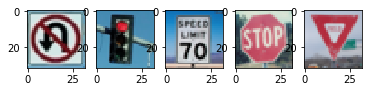

In [51]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import numpy as np

image_names = [
    'SignNoUTurn_resized.png',
    'SignTrafficLight_resized.png',
    'SignSpeedLimit70_resized.png',
    'SignStopSign_resized.png',
    'SignYieldSign_resized.png',
]

images = []
for i in range(len(image_names)):
    image = np.array(mpimg.imread(image_names[i], 'png') * 255, dtype=np.uint8)
    images.append(image)

fig = plt.figure()
for i in range(len(images)):
    fig.add_subplot(1, 5, i + 1)
    plt.imshow(images[i])
    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [52]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
def predict(X_data):
    sess = tf.get_default_session()
    return sess.run(tf.argmax(logits, 1), feed_dict={x: X_data})

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print(predict(images))

[35 11 34 14 10]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
Only the stop sign is correct: 20% accuracy, while the model performs at 96.3% accuracy on test set.

In [53]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
def softmax(X_data):
    sess = tf.get_default_session()
    return sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: X_data})

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print(softmax(images))

TopKV2(values=array([[  4.97999787e-01,   1.20170817e-01,   7.59478807e-02,
          7.16442540e-02,   5.65189607e-02],
       [  3.22694957e-01,   2.07814112e-01,   1.56397119e-01,
          9.98148620e-02,   6.62139654e-02],
       [  5.05098104e-01,   1.50730804e-01,   7.37400502e-02,
          4.69008200e-02,   3.87793630e-02],
       [  9.97188628e-01,   8.22552713e-04,   4.84816206e-04,
          3.10438947e-04,   1.97196059e-04],
       [  2.84999609e-01,   2.28536621e-01,   1.42926142e-01,
          1.27649054e-01,   1.04898922e-01]], dtype=float32), indices=array([[35, 19, 36, 10, 16],
       [11, 42, 20, 10, 35],
       [34, 35, 36, 17,  6],
       [14,  5, 29, 17, 15],
       [10, 12, 30, 11, 13]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
Only the correct prediction (Stop Sign, index 3) has 99.7% certainty. The largest certainty for the rest of the images is 50.5%.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.